In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 86s 1us/step


In [3]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D((2,2))) 
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2,2))) 
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 42s 65ms/step - loss: 1.6365 - accuracy: 0.3978 - val_loss: 1.3992 - val_accuracy: 0.4945
Epoch 2/10
625/625 [==============================] - 46s 73ms/step - loss: 1.2981 - accuracy: 0.5333 - val_loss: 1.1785 - val_accuracy: 0.5837
Epoch 3/10
625/625 [==============================] - 45s 73ms/step - loss: 1.1514 - accuracy: 0.5929 - val_loss: 1.0884 - val_accuracy: 0.6191
Epoch 4/10
625/625 [==============================] - 46s 74ms/step - loss: 1.0426 - accuracy: 0.6338 - val_loss: 1.0091 - val_accuracy: 0.6509
Epoch 5/10
625/625 [==============================] - 47s 74ms/step - loss: 0.9674 - accuracy: 0.6605 - val_loss: 0.9737 - val_accuracy: 0.6668
Epoch 6/10
625/625 [==============================] - 46s 74ms/step - loss: 0.9130 - accuracy: 0.6808 - val_loss: 0.9382 - val_accuracy: 0.6763
Epoch 7/10
625/625 [==============================] - 48s 77ms/step - loss: 0.8584 - accuracy: 0.6999 - val_loss: 0.9275 - val_accuracy:

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
index = int(input("Enter an index (0 to 9999) for test image: ")) 
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.") 
    index = 0

Enter an index (0 to 9999) for test image: 100


In [10]:
test_image = x_test[index] 
true_label = np.argmax(y_test[index])

In [11]:
prediction = model.predict(np.expand_dims(test_image, axis=0)) 
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 271ms/step


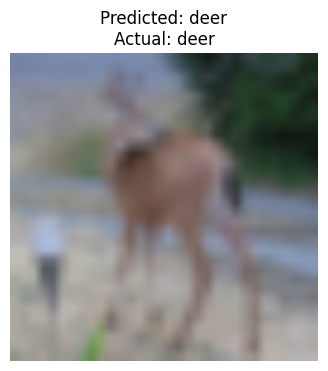

In [12]:
plt.figure(figsize=(4, 4)) 
resized_image = tf.image.resize(test_image, [128, 128])  
plt.imshow(resized_image) 
plt.axis('off') 
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}") 
plt.show()